# Machine Learning: Student classification Model

#### Imports

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore


# preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [6]:
df = pd.read_csv("student_habits_performance.csv")
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


## Data preprocessing

##### Checking Missing values and duplicates

In [7]:
print("Missing values:")
print(df.isnull().sum().sum())

Missing values:
91


In [8]:
missing_rows = df[df.isnull().any(axis=1)]
print(missing_rows)

    student_id  age  gender  study_hours_per_day  social_media_hours  \
10       S1010   19  Female                  4.6                 3.7   
33       S1033   18  Female                  4.0                 0.9   
47       S1047   23  Female                  2.5                 2.9   
74       S1074   21  Female                  2.3                 1.0   
93       S1093   22    Male                  4.1                 2.5   
..         ...  ...     ...                  ...                 ...   
921      S1921   23  Female                  4.4                 2.7   
925      S1925   19   Other                  1.7                 2.9   
939      S1939   18  Female                  4.7                 3.2   
945      S1945   23    Male                  6.0                 2.9   
967      S1967   22    Male                  5.2                 4.1   

     netflix_hours part_time_job  attendance_percentage  sleep_hours  \
10             0.8            No                   77.6        

In [9]:
df = df.drop(columns=['parental_education_level'])
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Average,1,No,69.7


In [10]:
print("Missing values:")
print(df.isnull().sum().sum())

Missing values:
0


In [11]:
print("Duplicates:")
print(df.duplicated().sum())

Duplicates:
0


##### Checking typos and outliers and resolve if any

In [12]:
df.dtypes

student_id                        object
age                                int64
gender                            object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
exam_score                       float64
dtype: object

In [13]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


##### Checking outliers

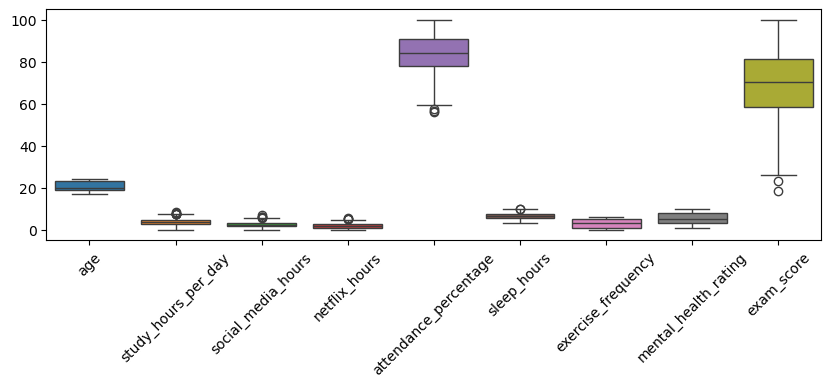

In [16]:
numeric_cols = df.select_dtypes(include='number').columns
plt.figure(figsize=(10,3))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.show()

In [17]:
z_scores = zscore(df[numeric_cols])
outlier_positions = np.where(np.abs(z_scores)> 3)
for row, col in zip(*outlier_positions):
    print(f"Row {row}, Feature '{numeric_cols[col]}', Value = {df.iloc[row, df.columns.get_loc(numeric_cols[col])]}, Z-score = {z_scores[row, col]:.2f}")

Row 145, Feature 'social_media_hours', Value = 6.2, Z-score = 3.15
Row 265, Feature 'exam_score', Value = 18.4, Z-score = -3.03
Row 361, Feature 'social_media_hours', Value = 6.1, Z-score = 3.07
Row 455, Feature 'study_hours_per_day', Value = 8.3, Z-score = 3.24
Row 556, Feature 'netflix_hours', Value = 5.4, Z-score = 3.33
Row 735, Feature 'social_media_hours', Value = 7.2, Z-score = 4.01
Row 797, Feature 'study_hours_per_day', Value = 8.2, Z-score = 3.17
Row 822, Feature 'netflix_hours', Value = 5.3, Z-score = 3.24


In [19]:
outlier_indices = np.unique(outlier_positions[0])
print(f"Rows to be removed (outliers): {outlier_indices}")

df_clean = df.drop(index=outlier_indices).reset_index(drop=True)
print(f"New dataset shape after removing outliers: {df_clean.shape}")
df_clean

Rows to be removed (outliers): [145 265 361 455 556 735 797 822]
New dataset shape after removing outliers: (992, 15)


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,Good,6,Yes,76.1
988,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,Average,6,Yes,65.9
989,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Good,9,Yes,64.4
990,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Average,1,No,69.7


### Feature Engineering/Selection

##### numerical correlation

In [20]:
corr = df_clean[numeric_cols].corr()
print("#########################")
print("Pearson correlation")
print("#########################")
print(corr['exam_score'].sort_values(ascending=True))

#########################
Pearson correlation
#########################
netflix_hours           -0.167123
social_media_hours      -0.164083
age                     -0.011105
attendance_percentage    0.088507
sleep_hours              0.124239
exercise_frequency       0.152952
mental_health_rating     0.319113
study_hours_per_day      0.824307
exam_score               1.000000
Name: exam_score, dtype: float64


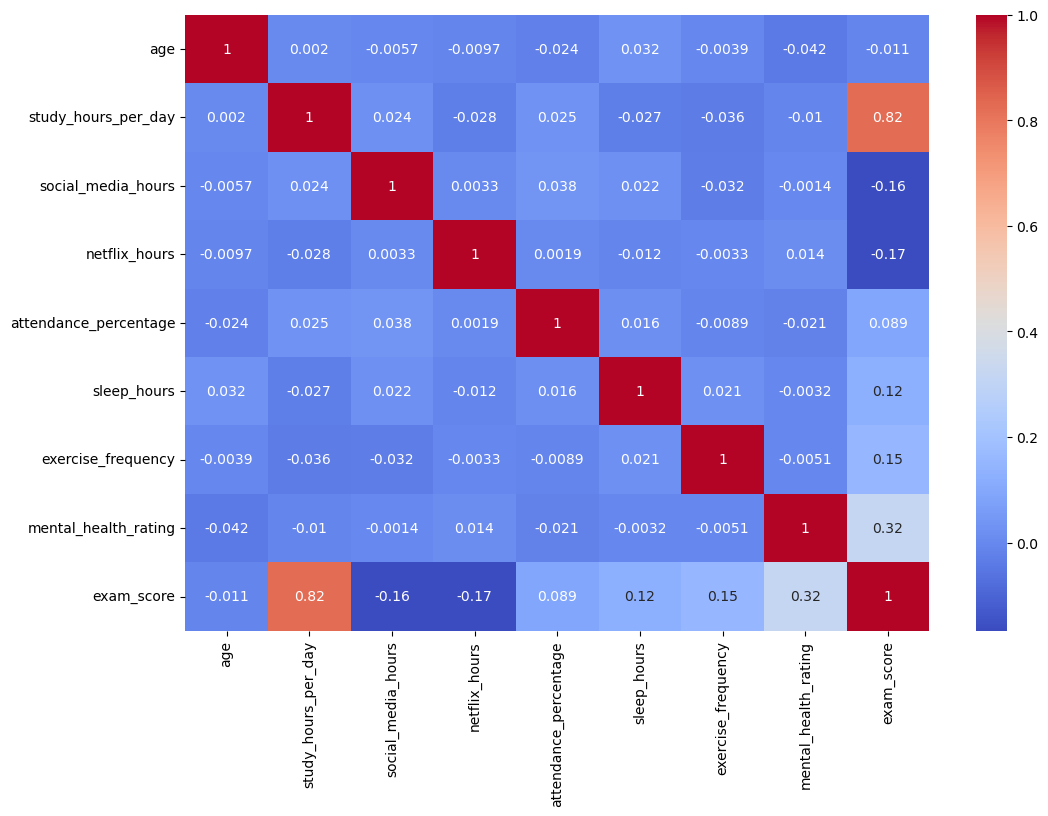

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

##### At glance the above shows study_hours_per_day and mental_health_rating having predictive power to the target, but I will use the model to tell me which ones are better features but with this Pearson correlation that is the information I get 

In [84]:

E_HIGH = 75
A_HIGH = 80

E_MID = 60
A_MID = 75

E_LOW = 50
A_LOW = 60



conditions = [
    # A. HIGH EXAM SCORE CATEGORIES (E >= 75) - PRIORITIZED
    
    # 1. Academic Vanguard: High E, High A (The Ideal Student)
    (df_clean['exam_score'] >= E_HIGH) & (df_clean['attendance_percentage'] >= A_HIGH),
    
    # 2. Efficient Genius: High E, Moderate A (High Performance with less-than-perfect discipline)
    (df_clean['exam_score'] >= E_HIGH) & (df_clean['attendance_percentage'] >= A_MID) & (df_clean['attendance_percentage'] < A_HIGH),

    # 3. Independent/Brilliant: High E, Low A (High Performance despite very low attendance)
    # Catches all remaining students with E >= 75
    (df_clean['exam_score'] >= E_HIGH),
    
    
    # B. MODERATE EXAM SCORE CATEGORIES (60 <= E < 75)
    
    # 4. Good Performer: Mod E, High A (Solid results supported by strong discipline)
    (df_clean['exam_score'] >= E_MID) & (df_clean['exam_score'] < E_HIGH) & (df_clean['attendance_percentage'] >= A_HIGH),
    
    # 5. Compliant/Average: Mod E, Mod A (Meets all requirements adequately)
    (df_clean['exam_score'] >= E_LOW) & (df_clean['exam_score'] < E_MID) & (df_clean['attendance_percentage'] >= A_MID),
    
    # 6. Risky/Unreliable: Mod E, Low A (Achieving a pass despite low discipline)
    # Catches all remaining students with 60 <= E < 75
    (df_clean['exam_score'] >= E_MID) & (df_clean['exam_score'] < E_HIGH),


    # C. LOW EXAM SCORE CATEGORIES (E < 60)
    
    # 7. Dedicated Struggler: Low E, High A (Trying hard, but results are low)
    (df_clean['exam_score'] < E_MID) & (df_clean['attendance_percentage'] >= A_HIGH),
    
    # 8. Needs Improvement: Low E, Mod A (Below average results with adequate discipline)
    (df_clean['exam_score'] < E_MID) & (df_clean['attendance_percentage'] >= A_MID),
    
    # 9. Disengaged Underperformer: Low E, Low A
    # Catches all remaining students (E < 60) and serves as the final, absolute catch-all.
    (df_clean['exam_score'] < E_MID),
]


labels = [
    'Academic Vanguard',
    'Efficient Genius',
    'Independent Achiever',
    'Good Performer',
    'Average',
    'Risky/Unreliable',
    'Dedicated Struggler',
    'Needs Improvement',
    'Disengaged Underperformer',
]

# --- 3. Apply Logic and Assign to DataFrame ---
df_clean['student_type'] = np.select(
    conditions,
    labels,
    default='CRITICAL ERROR: Check Logic'
)

# --- 4. Verification Step ---
print("First 20 rows with the new column (E & A only):")
print(df_clean[['exam_score', 'attendance_percentage', 'student_type']].head(20))
print("\nDistribution of the new feature:")
print(df_clean['student_type'].value_counts())

First 20 rows with the new column (E & A only):
    exam_score  attendance_percentage               student_type
0         56.2                   85.0                    Average
1        100.0                   97.3          Academic Vanguard
2         34.3                   94.8        Dedicated Struggler
3         26.8                   71.0  Disengaged Underperformer
4         66.4                   90.9             Good Performer
5        100.0                   82.9          Academic Vanguard
6         89.8                   85.8          Academic Vanguard
7         72.6                   77.7           Risky/Unreliable
8         78.9                  100.0          Academic Vanguard
9        100.0                   95.4          Academic Vanguard
10        63.3                   77.6           Risky/Unreliable
11        74.4                   71.7           Risky/Unreliable
12        76.9                   81.1          Academic Vanguard
13        75.8                   89.3     

In [85]:
df_clean


,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,internet_quality,mental_health_rating,extracurricular_participation,exam_score,student_type,diet_quality_encoded,part_time_job_encoded,internet_quality_encoded,extracurricular_participation_encoded
0,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Average,8,Yes,56.2,Average,1.0,0.0,1.0,1.0
1,6.9,2.8,2.3,No,97.3,4.6,Good,6,Average,8,No,100.0,Academic Vanguard,2.0,0.0,1.0,0.0
2,1.4,3.1,1.3,No,94.8,8.0,Poor,1,Poor,1,No,34.3,Dedicated Struggler,0.0,0.0,0.0,0.0
3,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Good,1,Yes,26.8,Disengaged Underperformer,0.0,0.0,2.0,1.0
4,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Good,1,No,66.4,Good Performer,1.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,2.6,0.5,1.6,No,77.0,7.5,Fair,2,Good,6,Yes,76.1,Efficient Genius,1.0,0.0,2.0,1.0
988,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,Average,6,Yes,65.9,Good Performer,0.0,1.0,1.0,1.0
989,3.0,2.6,1.3,No,61.9,6.5,Good,5,Good,9,Yes,64.4,Risky/Unreliable,2.0,0.0,2.0,1.0
990,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Average,1,No,69.7,Good Performer,1.0,1.0,1.0,0.0


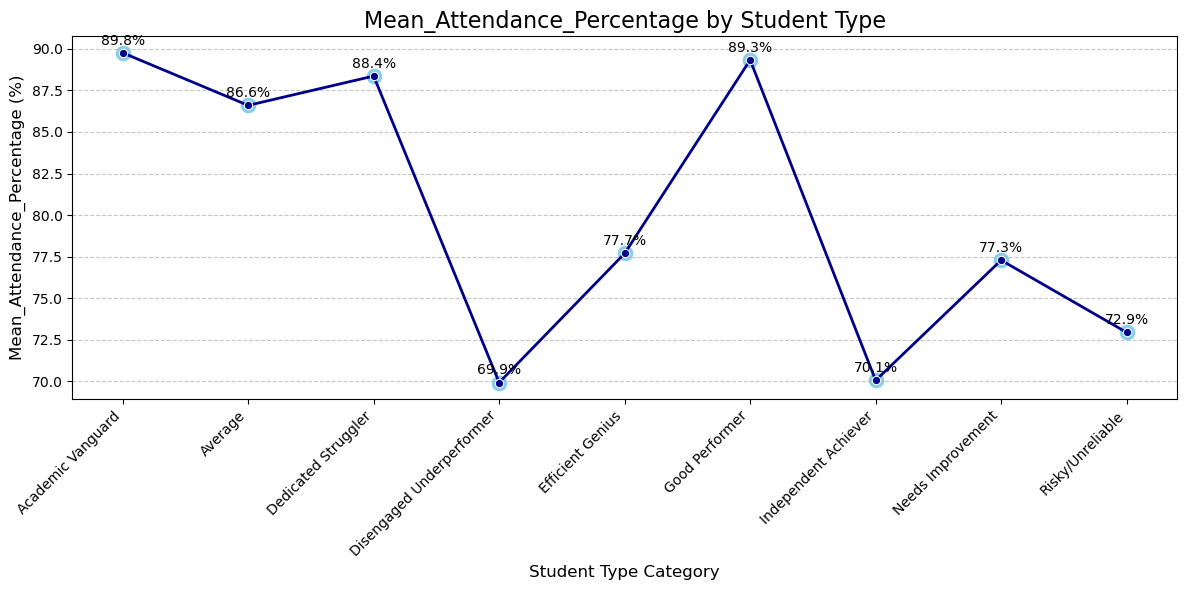

--- Mean_Attendance_Percentageby Student Type ---
| student_type              |   Mean_Attendance_Percentage |
|:--------------------------|-----------------------------:|
| Academic Vanguard         |                         89.8 |
| Good Performer            |                         89.3 |
| Dedicated Struggler       |                         88.4 |
| Average                   |                         86.6 |
| Efficient Genius          |                         77.7 |
| Needs Improvement         |                         77.3 |
| Risky/Unreliable          |                         72.9 |
| Independent Achiever      |                         70.1 |
| Disengaged Underperformer |                         69.9 |


In [86]:
performance_summary = df_clean.groupby('student_type')['attendance_percentage'].mean().reset_index()
performance_summary.rename(columns={'attendance_percentage': 'Mean_Attendance_Percentage'}, inplace=True)

#ordering
order = performance_summary.sort_values(by='Mean_Attendance_Percentage',ascending=False)['student_type']

plt.figure(figsize=(12, 6))

# Use a line plot from seaborn to show the trend across categories
sns.lineplot(
    data=performance_summary,
    x='student_type',
    y='Mean_Attendance_Percentage',
    sort=False,  # Already sorted by 'order'
    marker='o',  # Adds circles at each data point
    color='darkblue',
    linewidth=2
)

# Use a scatter plot overlay to make the data points clearer
sns.scatterplot(
    data=performance_summary,
    x='student_type',
    y='Mean_Attendance_Percentage',
    s=150,  # Size of markers
    color='skyblue'
)

# --- 4. Customize the Plot for Readability ---


plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.title('Mean_Attendance_Percentage by Student Type', fontsize=16)
plt.xlabel('Student Type Category', fontsize=12)
plt.ylabel('Mean_Attendance_Percentage (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Annotate each point with the exact mean score
for index, row in performance_summary.iterrows():
    plt.text(
        row['student_type'], 
        row['Mean_Attendance_Percentage'] + 0.5, # Slightly above the point
        f"{row['Mean_Attendance_Percentage']:.1f}%", 
        ha='center', 
        fontsize=10, 
        color='black'
    )

plt.tight_layout()
plt.show()

print("--- Mean_Attendance_Percentageby Student Type ---")
print(performance_summary.sort_values(by='Mean_Attendance_Percentage', ascending=False).to_markdown(index=False, floatfmt=".1f"))




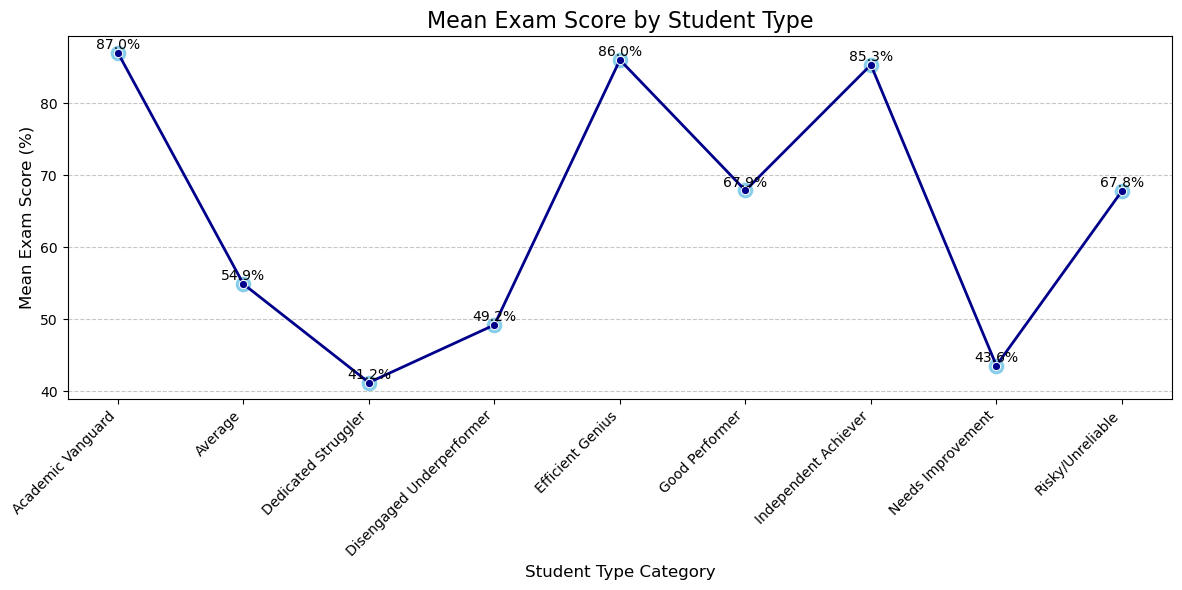

--- Mean Exam Scores by Student Type ---
| student_type              |   Mean_Exam_Score |
|:--------------------------|------------------:|
| Academic Vanguard         |              87.0 |
| Efficient Genius          |              86.0 |
| Independent Achiever      |              85.3 |
| Good Performer            |              67.9 |
| Risky/Unreliable          |              67.8 |
| Average                   |              54.9 |
| Disengaged Underperformer |              49.2 |
| Needs Improvement         |              43.6 |
| Dedicated Struggler       |              41.2 |


In [87]:
performance_summary = df_clean.groupby('student_type')['exam_score'].mean().reset_index()
performance_summary.rename(columns={'exam_score': 'Mean_Exam_Score'}, inplace=True)

#ordering
order = performance_summary.sort_values(by='Mean_Exam_Score',ascending=False)['student_type']

plt.figure(figsize=(12, 6))

# Use a line plot from seaborn to show the trend across categories
sns.lineplot(
    data=performance_summary,
    x='student_type',
    y='Mean_Exam_Score',
    sort=False,  # Already sorted by 'order'
    marker='o',  # Adds circles at each data point
    color='darkblue',
    linewidth=2
)

# Use a scatter plot overlay to make the data points clearer
sns.scatterplot(
    data=performance_summary,
    x='student_type',
    y='Mean_Exam_Score',
    s=150,  # Size of markers
    color='skyblue'
)

# --- 4. Customize the Plot for Readability ---


plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.title('Mean Exam Score by Student Type', fontsize=16)
plt.xlabel('Student Type Category', fontsize=12)
plt.ylabel('Mean Exam Score (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Annotate each point with the exact mean score
for index, row in performance_summary.iterrows():
    plt.text(
        row['student_type'], 
        row['Mean_Exam_Score'] + 0.5, # Slightly above the point
        f"{row['Mean_Exam_Score']:.1f}%", 
        ha='center', 
        fontsize=10, 
        color='black'
    )

plt.tight_layout()
plt.show()

print("--- Mean Exam Scores by Student Type ---")
print(performance_summary.sort_values(by='Mean_Exam_Score', ascending=False).to_markdown(index=False, floatfmt=".1f"))




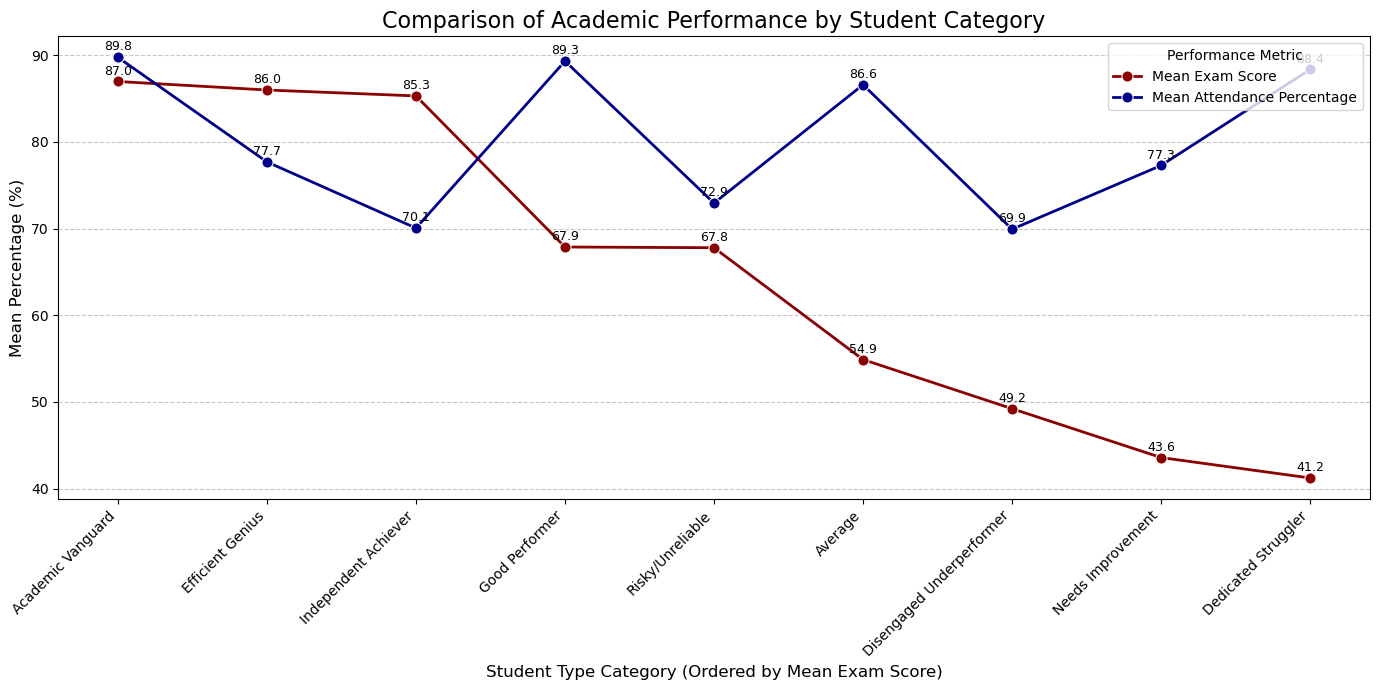

--- Data Used for Plotting (Long Format Sample) ---
| student_type         | Metric                     |   Mean Percentage |
|:---------------------|:---------------------------|------------------:|
| Academic Vanguard    | Mean Exam Score            |              87.0 |
| Academic Vanguard    | Mean Attendance Percentage |              89.8 |
| Efficient Genius     | Mean Attendance Percentage |              77.7 |
| Efficient Genius     | Mean Exam Score            |              86.0 |
| Independent Achiever | Mean Attendance Percentage |              70.1 |


In [88]:
# --- 1. DATA PREPARATION ---
performance_summary = df_clean.groupby('student_type').agg({
    'exam_score': 'mean',
    'attendance_percentage': 'mean'
}).reset_index()

performance_summary.rename(columns={
    'exam_score': 'Mean Exam Score',
    'attendance_percentage': 'Mean Attendance Percentage'
}, inplace=True)

# --- 2. LONG FORMAT (MELT) ---
combined_long_df = performance_summary.melt(
    id_vars='student_type',
    var_name='Metric',
    value_name='Mean Percentage'
)

# --- 3. ORDER student_type BY Mean Exam Score ---
exam_score_order = performance_summary.sort_values(
    by='Mean Exam Score',
    ascending=False
)['student_type'].tolist()

# --- 4. SORT THE LONG DF BASED ON ORDER ---
combined_long_df['student_type'] = pd.Categorical(
    combined_long_df['student_type'],
    categories=exam_score_order,
    ordered=True
)

combined_long_df_sorted = combined_long_df.sort_values('student_type')

# --- 5. PLOT ---
plt.figure(figsize=(14, 7))

sns.lineplot(
    data=combined_long_df_sorted,
    x='student_type',
    y='Mean Percentage',
    hue='Metric',
    hue_order=['Mean Exam Score', 'Mean Attendance Percentage'],
    marker='o',
    markersize=8,
    linewidth=2,
    linestyle='-',
    palette=['darkred', 'darkblue']
)

# Labeling
plt.title('Comparison of Academic Performance by Student Category', fontsize=16)
plt.xlabel('Student Type Category (Ordered by Mean Exam Score)', fontsize=12)
plt.ylabel('Mean Percentage (%)', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Performance Metric', loc='upper right')

# --- 6. ANNOTATE POINTS ---
for index, row in combined_long_df_sorted.iterrows():
    plt.text(
        x=row['student_type'],
        y=row['Mean Percentage'] + 0.8,
        s=f"{row['Mean Percentage']:.1f}",
        ha='center',
        fontsize=9,
        color='black'
    )

plt.tight_layout()
plt.show()

# --- 7. PRINT SAMPLE OF DATA USED ---
print("--- Data Used for Plotting (Long Format Sample) ---")
print(combined_long_df_sorted.head().to_markdown(index=False, floatfmt=".1f"))

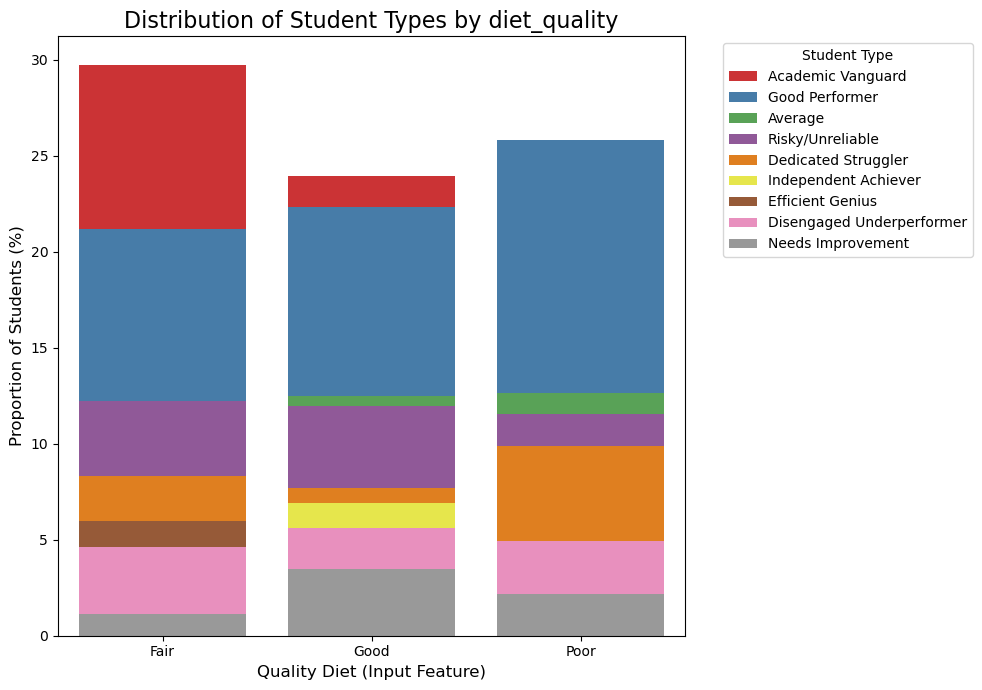

In [89]:

distinct_colors = [
    "#e41a1c",  # 1 - strong red
    "#377eb8",  # 2 - strong blue
    "#4daf4a",  # 3 - green
    "#984ea3",  # 4 - purple
    "#ff7f00",  # 5 - orange
    "#ffff33",  # 6 - yellow
    "#a65628",  # 7 - brown
    "#f781bf",  # 8 - pink
    "#999999",  # 9 - grey (new distinct color)
]

# --- 1. Create a Contingency Table of Proportions (The core data preparation) ---
# Calculate the proportion of EACH student_type for every level of diet_quality
contingency_proportions = df_clean.groupby('diet_quality')['student_type'].value_counts(normalize=True).mul(100).rename('Proportion').reset_index()

# --- 2. Define the Target Category Order (for consistency) ---
# Use the exam score order found earlier
target_order = df_clean['student_type'].value_counts().index.tolist() 

# --- 3. Create the Stacked Bar Plot ---
plt.figure(figsize=(10, 7))

# Use a bar plot with 'Proportion' on Y and 'student_type' as the Hue (stack)
sns.barplot(
    data=contingency_proportions,
    x='diet_quality',
    y='Proportion',
    hue='student_type',
    hue_order=target_order, # Maintain consistent color mapping
    dodge=False, # This is crucial for stacking the bars
    palette=distinct_colors[:len(target_order)] 
)

# --- 4. Customization ---
plt.title('Distribution of Student Types by diet_quality', fontsize=16)
plt.xlabel('Quality Diet (Input Feature)', fontsize=12)
plt.ylabel('Proportion of Students (%)', fontsize=12)
plt.legend(title='Student Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

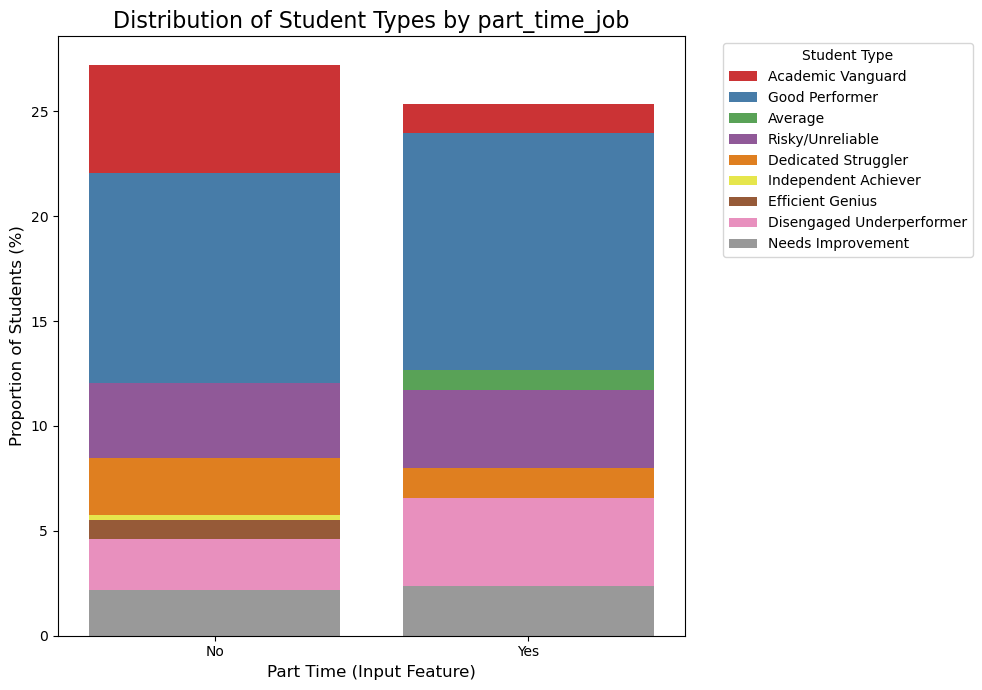

In [90]:

distinct_colors = [
    "#e41a1c",  # 1 - strong red
    "#377eb8",  # 2 - strong blue
    "#4daf4a",  # 3 - green
    "#984ea3",  # 4 - purple
    "#ff7f00",  # 5 - orange
    "#ffff33",  # 6 - yellow
    "#a65628",  # 7 - brown
    "#f781bf",  # 8 - pink
    "#999999",  # 9 - grey (new distinct color)
]

# --- 1. Create a Contingency Table of Proportions (The core data preparation) ---
# Calculate the proportion of EACH student_type for every level of diet_quality
contingency_proportions = df_clean.groupby('part_time_job')['student_type'].value_counts(normalize=True).mul(100).rename('Proportion').reset_index()

# --- 2. Define the Target Category Order (for consistency) ---
# Use the exam score order found earlier
target_order = df_clean['student_type'].value_counts().index.tolist() 

# --- 3. Create the Stacked Bar Plot ---
plt.figure(figsize=(10, 7))

# Use a bar plot with 'Proportion' on Y and 'student_type' as the Hue (stack)
sns.barplot(
    data=contingency_proportions,
    x='part_time_job',
    y='Proportion',
    hue='student_type',
    hue_order=target_order, # Maintain consistent color mapping
    dodge=False, # This is crucial for stacking the bars
    palette=distinct_colors[:len(target_order)] 
)

# --- 4. Customization ---
plt.title('Distribution of Student Types by part_time_job', fontsize=16)
plt.xlabel('Part Time (Input Feature)', fontsize=12)
plt.ylabel('Proportion of Students (%)', fontsize=12)
plt.legend(title='Student Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

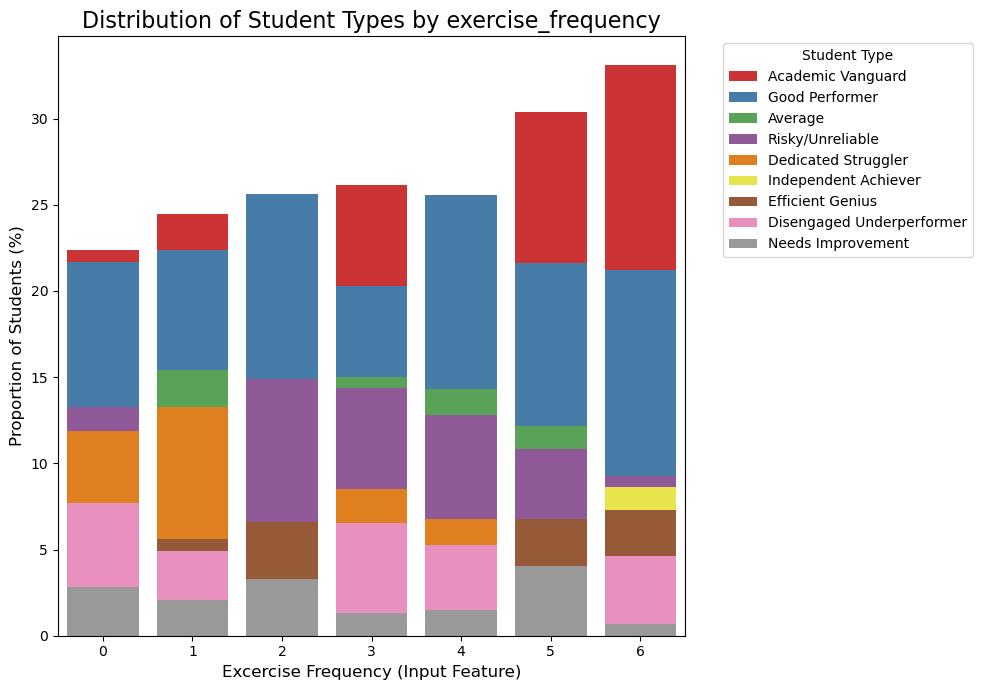

In [91]:

distinct_colors = [
    "#e41a1c",  # 1 - strong red
    "#377eb8",  # 2 - strong blue
    "#4daf4a",  # 3 - green
    "#984ea3",  # 4 - purple
    "#ff7f00",  # 5 - orange
    "#ffff33",  # 6 - yellow
    "#a65628",  # 7 - brown
    "#f781bf",  # 8 - pink
    "#999999",  # 9 - grey (new distinct color)
]

# --- 1. Create a Contingency Table of Proportions (The core data preparation) ---
# Calculate the proportion of EACH student_type for every level of diet_quality
contingency_proportions = df_clean.groupby('exercise_frequency')['student_type'].value_counts(normalize=True).mul(100).rename('Proportion').reset_index()

# --- 2. Define the Target Category Order (for consistency) ---
# Use the exam score order found earlier
target_order = df_clean['student_type'].value_counts().index.tolist() 

# --- 3. Create the Stacked Bar Plot ---
plt.figure(figsize=(10, 7))

# Use a bar plot with 'Proportion' on Y and 'student_type' as the Hue (stack)
sns.barplot(
    data=contingency_proportions,
    x='exercise_frequency',
    y='Proportion',
    hue='student_type',
    hue_order=target_order, # Maintain consistent color mapping
    dodge=False, # This is crucial for stacking the bars
    palette=distinct_colors[:len(target_order)] 
)

# --- 4. Customization ---
plt.title('Distribution of Student Types by exercise_frequency', fontsize=16)
plt.xlabel('Excercise Frequency (Input Feature)', fontsize=12)
plt.ylabel('Proportion of Students (%)', fontsize=12)
plt.legend(title='Student Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

#### SPLIT THE DATA INTO TRAINING,VALIDATION AND TEST SETS

In [92]:


#df_clean

X = df_clean.drop(columns=['student_type'])
y = df_clean['student_type']


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

X

,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,internet_quality,mental_health_rating,extracurricular_participation,exam_score,diet_quality_encoded,part_time_job_encoded,internet_quality_encoded,extracurricular_participation_encoded
0,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Average,8,Yes,56.2,1.0,0.0,1.0,1.0
1,6.9,2.8,2.3,No,97.3,4.6,Good,6,Average,8,No,100.0,2.0,0.0,1.0,0.0
2,1.4,3.1,1.3,No,94.8,8.0,Poor,1,Poor,1,No,34.3,0.0,0.0,0.0,0.0
3,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Good,1,Yes,26.8,0.0,0.0,2.0,1.0
4,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Good,1,No,66.4,1.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,2.6,0.5,1.6,No,77.0,7.5,Fair,2,Good,6,Yes,76.1,1.0,0.0,2.0,1.0
988,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,Average,6,Yes,65.9,0.0,1.0,1.0,1.0
989,3.0,2.6,1.3,No,61.9,6.5,Good,5,Good,9,Yes,64.4,2.0,0.0,2.0,1.0
990,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Average,1,No,69.7,1.0,1.0,1.0,0.0


###### Using Cross-Validation 

In [93]:
encoder = OrdinalEncoder(categories=[['Poor','Fair','Good']])
df_clean['diet_quality_encoded'] = encoder.fit_transform(df_clean[['diet_quality']])

encoder_1 = OrdinalEncoder(categories=[['No','Yes']])
df_clean['part_time_job_encoded'] = encoder_1.fit_transform(df_clean[['part_time_job']])
# NO -> 0
# YES ->1

encoder_1 = OrdinalEncoder(categories=[['Poor','Average','Good']])
df_clean['internet_quality_encoded'] = encoder_1.fit_transform(df_clean[['internet_quality']])
# POOR -> 0
# AVERAGE ->1
# GOOD -> 2


encoder_1 = OrdinalEncoder(categories=[['No','Yes']])
df_clean['extracurricular_participation_encoded'] = encoder_1.fit_transform(df_clean[['extracurricular_participation']])
# NO -> 0
# YES ->1



df_clean

,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,internet_quality,mental_health_rating,extracurricular_participation,exam_score,student_type,diet_quality_encoded,part_time_job_encoded,internet_quality_encoded,extracurricular_participation_encoded
0,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Average,8,Yes,56.2,Average,1.0,0.0,1.0,1.0
1,6.9,2.8,2.3,No,97.3,4.6,Good,6,Average,8,No,100.0,Academic Vanguard,2.0,0.0,1.0,0.0
2,1.4,3.1,1.3,No,94.8,8.0,Poor,1,Poor,1,No,34.3,Dedicated Struggler,0.0,0.0,0.0,0.0
3,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Good,1,Yes,26.8,Disengaged Underperformer,0.0,0.0,2.0,1.0
4,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Good,1,No,66.4,Good Performer,1.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,2.6,0.5,1.6,No,77.0,7.5,Fair,2,Good,6,Yes,76.1,Efficient Genius,1.0,0.0,2.0,1.0
988,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,Average,6,Yes,65.9,Good Performer,0.0,1.0,1.0,1.0
989,3.0,2.6,1.3,No,61.9,6.5,Good,5,Good,9,Yes,64.4,Risky/Unreliable,2.0,0.0,2.0,1.0
990,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Average,1,No,69.7,Good Performer,1.0,1.0,1.0,0.0


In [94]:
df = df_clean.drop(columns=['diet_quality', 'part_time_job','extracurricular_participation'])


In [95]:
df


,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,internet_quality,mental_health_rating,exam_score,student_type,diet_quality_encoded,part_time_job_encoded,internet_quality_encoded,extracurricular_participation_encoded
0,0.0,1.2,1.1,85.0,8.0,6,Average,8,56.2,Average,1.0,0.0,1.0,1.0
1,6.9,2.8,2.3,97.3,4.6,6,Average,8,100.0,Academic Vanguard,2.0,0.0,1.0,0.0
2,1.4,3.1,1.3,94.8,8.0,1,Poor,1,34.3,Dedicated Struggler,0.0,0.0,0.0,0.0
3,1.0,3.9,1.0,71.0,9.2,4,Good,1,26.8,Disengaged Underperformer,0.0,0.0,2.0,1.0
4,5.0,4.4,0.5,90.9,4.9,3,Good,1,66.4,Good Performer,1.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,2.6,0.5,1.6,77.0,7.5,2,Good,6,76.1,Efficient Genius,1.0,0.0,2.0,1.0
988,2.9,1.0,2.4,86.0,6.8,1,Average,6,65.9,Good Performer,0.0,1.0,1.0,1.0
989,3.0,2.6,1.3,61.9,6.5,5,Good,9,64.4,Risky/Unreliable,2.0,0.0,2.0,1.0
990,5.4,4.1,1.1,100.0,7.6,0,Average,1,69.7,Good Performer,1.0,1.0,1.0,0.0


In [96]:
df = df.drop(columns=['internet_quality'])
df

,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,student_type,diet_quality_encoded,part_time_job_encoded,internet_quality_encoded,extracurricular_participation_encoded
0,0.0,1.2,1.1,85.0,8.0,6,8,56.2,Average,1.0,0.0,1.0,1.0
1,6.9,2.8,2.3,97.3,4.6,6,8,100.0,Academic Vanguard,2.0,0.0,1.0,0.0
2,1.4,3.1,1.3,94.8,8.0,1,1,34.3,Dedicated Struggler,0.0,0.0,0.0,0.0
3,1.0,3.9,1.0,71.0,9.2,4,1,26.8,Disengaged Underperformer,0.0,0.0,2.0,1.0
4,5.0,4.4,0.5,90.9,4.9,3,1,66.4,Good Performer,1.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,2.6,0.5,1.6,77.0,7.5,2,6,76.1,Efficient Genius,1.0,0.0,2.0,1.0
988,2.9,1.0,2.4,86.0,6.8,1,6,65.9,Good Performer,0.0,1.0,1.0,1.0
989,3.0,2.6,1.3,61.9,6.5,5,9,64.4,Risky/Unreliable,2.0,0.0,2.0,1.0
990,5.4,4.1,1.1,100.0,7.6,0,1,69.7,Good Performer,1.0,1.0,1.0,0.0


In [97]:



X = df.drop(columns=['student_type'])
y = df['student_type']


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

X

,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,diet_quality_encoded,part_time_job_encoded,internet_quality_encoded,extracurricular_participation_encoded
0,0.0,1.2,1.1,85.0,8.0,6,8,56.2,1.0,0.0,1.0,1.0
1,6.9,2.8,2.3,97.3,4.6,6,8,100.0,2.0,0.0,1.0,0.0
2,1.4,3.1,1.3,94.8,8.0,1,1,34.3,0.0,0.0,0.0,0.0
3,1.0,3.9,1.0,71.0,9.2,4,1,26.8,0.0,0.0,2.0,1.0
4,5.0,4.4,0.5,90.9,4.9,3,1,66.4,1.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
987,2.6,0.5,1.6,77.0,7.5,2,6,76.1,1.0,0.0,2.0,1.0
988,2.9,1.0,2.4,86.0,6.8,1,6,65.9,0.0,1.0,1.0,1.0
989,3.0,2.6,1.3,61.9,6.5,5,9,64.4,2.0,0.0,2.0,1.0
990,5.4,4.1,1.1,100.0,7.6,0,1,69.7,1.0,1.0,1.0,0.0


In [98]:
models = {
    "Decision Tree":DecisionTreeClassifier(random_state=42),
    "Random Forest":RandomForestClassifier(random_state=42),
    "Gradient Booksting":GradientBoostingClassifier(random_state=42)
}


In [99]:
cv_results = {}

for name, model in models.items():
    scores = cross_val_score(
        model,
        X_train,
        y_train,
        cv=5,
        scoring='accuracy'
    )
    cv_results[name] = scores.mean()
    print(f"{name} CV Accuracy: {scores.mean():.4f}")

Decision Tree CV Accuracy: 0.9912
Random Forest CV Accuracy: 0.9886
Gradient Booksting CV Accuracy: 0.9823


#### HyperParameters Tuning

In [100]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5,scoring='accuracy')
grid.fit(X_train, y_train)

best_rf = grid.best_estimator_
print("Best RF params:", grid.best_params_)


Best RF params: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}


In [101]:
gb_param_grid = {
    'n_estimators': [100, 200], # Number of sequential trees
    'max_depth': [3, 5],        # Depth of individual trees (usually kept low, e.g., 3-5)
    'learning_rate': [0.05, 0.1, 0.2] # CRITICAL: Controls the step size
    # Removed 'min_samples_leaf' as it's less critical/often not tuned first
}

# --- Grid Search Setup ---
grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    gb_param_grid,  # Use the corrected GB parameter grid
    cv=5,
    scoring='accuracy'
)

# --- Execution ---
grid.fit(X_train, y_train)

# --- Results (Corrected Naming) ---
# NOTE: The variable should be 'best_gb' since you are tuning the GB model.
best_gb = grid.best_estimator_
print("Best GB params:", grid.best_params_)
print(f"Best GB CV Accuracy: {grid.best_score_:.4f}")


Best GB params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
Best GB CV Accuracy: 0.9849


##### Selecting best feature

exam_score                               0.407134
attendance_percentage                    0.278944
study_hours_per_day                      0.117648
sleep_hours                              0.039853
mental_health_rating                     0.036473
social_media_hours                       0.036450
netflix_hours                            0.033624
exercise_frequency                       0.020060
diet_quality_encoded                     0.009604
internet_quality_encoded                 0.009432
extracurricular_participation_encoded    0.005840
part_time_job_encoded                    0.004938
dtype: float64


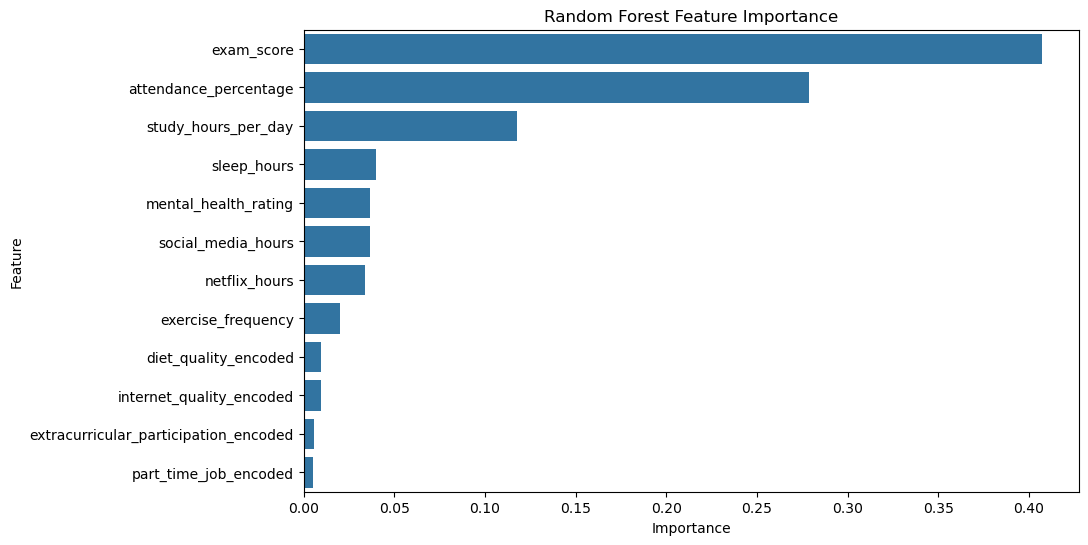

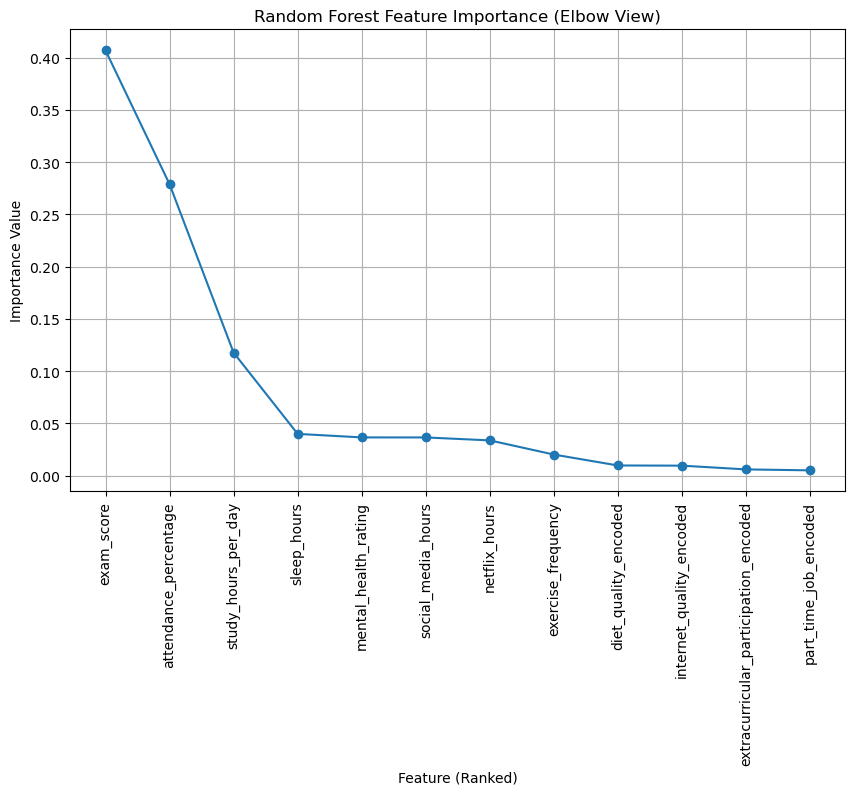

In [107]:
#Random Forest

importances = pd.Series(best_rf.feature_importances_,index=X_train.columns)
# Sort from most important to least
importances = importances.sort_values(ascending=False)

print(importances)


plt.figure(figsize=(10,6))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


# Modified plotting code for a line graph

plt.figure(figsize=(10,6))
# Use plt.plot instead of sns.barplot
plt.plot(importances.values, marker='o') 
plt.xticks(ticks=range(len(importances)), labels=importances.index, rotation=90)
plt.title("Random Forest Feature Importance (Elbow View)")
plt.xlabel("Feature (Ranked)")
plt.ylabel("Importance Value")
plt.grid(True)
plt.show()

exam_score                               6.204561e-01
attendance_percentage                    3.767050e-01
netflix_hours                            1.154686e-03
mental_health_rating                     1.138794e-03
sleep_hours                              2.080807e-04
exercise_frequency                       1.907355e-04
social_media_hours                       1.466494e-04
study_hours_per_day                      8.324007e-17
part_time_job_encoded                    2.141579e-17
diet_quality_encoded                     1.607543e-17
internet_quality_encoded                 0.000000e+00
extracurricular_participation_encoded    0.000000e+00
dtype: float64
###################################################


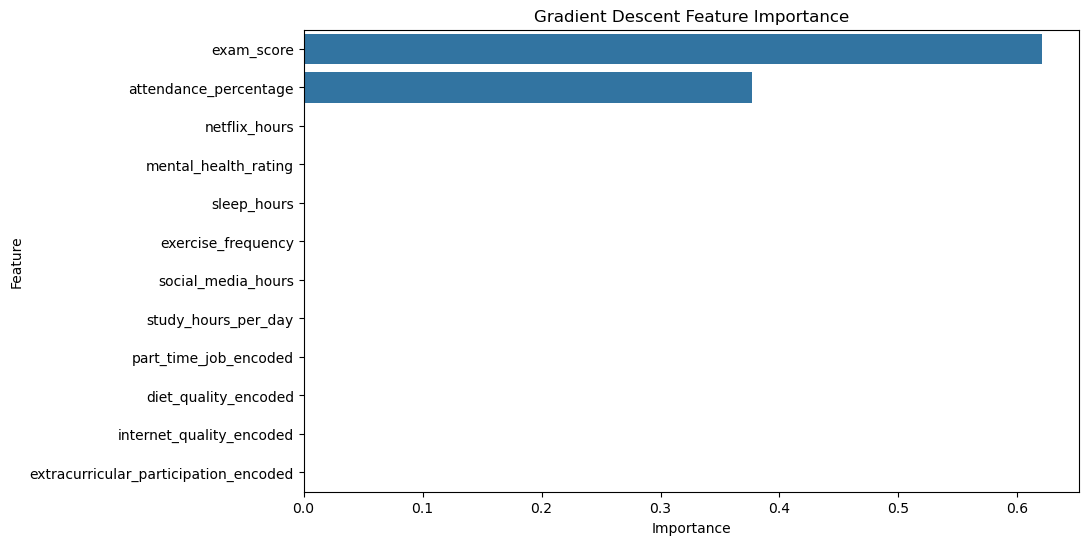

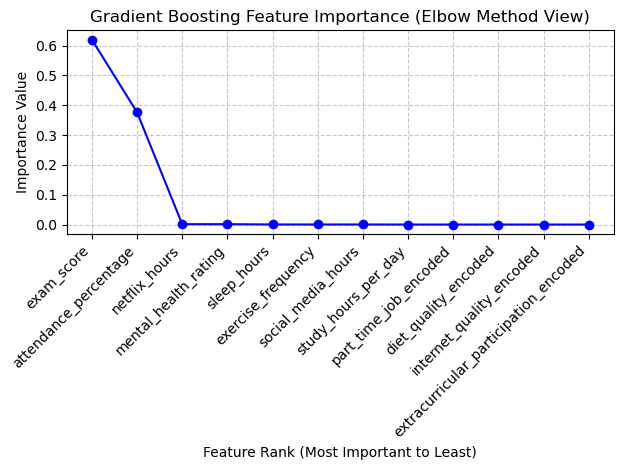

In [108]:
#Gradient Descent

importances = pd.Series(best_gb.feature_importances_,index=X_train.columns)
# Sort from most important to least
importances = importances.sort_values(ascending=False)

print(importances)
print("###################################################")

plt.figure(figsize=(10,6))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Gradient Descent Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


plt.plot(importances.values, marker='o', linestyle='-', color='blue')

# Set the x-axis ticks to be the actual feature names, rotated for readability
plt.xticks(
    ticks=range(len(importances)),
    labels=importances.index,
    rotation=45,
    ha='right' # Align text nicely
)

plt.title("Gradient Boosting Feature Importance (Elbow Method View)")
plt.xlabel("Feature Rank (Most Important to Least)")
plt.ylabel("Importance Value")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

##### Training

In [110]:
#Random Forest Model

features = ['exam_score', 'attendance_percentage','study_hours_per_day']  # only the two features you want
X_train_subset = X_train[features]
X_test_subset = X_test[features]


rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_subset, y_train)

y_pred = rf.predict(X_test_subset)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9899497487437185


In [113]:
#Gradient Boosting Model

features = ['exam_score', 'attendance_percentage']  # only the two features you want
X_train_subset = X_train[features]
X_test_subset = X_test[features]


gb =  GradientBoostingClassifier(random_state=42)
gb.fit(X_train_subset, y_train)

y_pred = gb.predict(X_test_subset)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9949748743718593


#### Rechecking for Accuracy

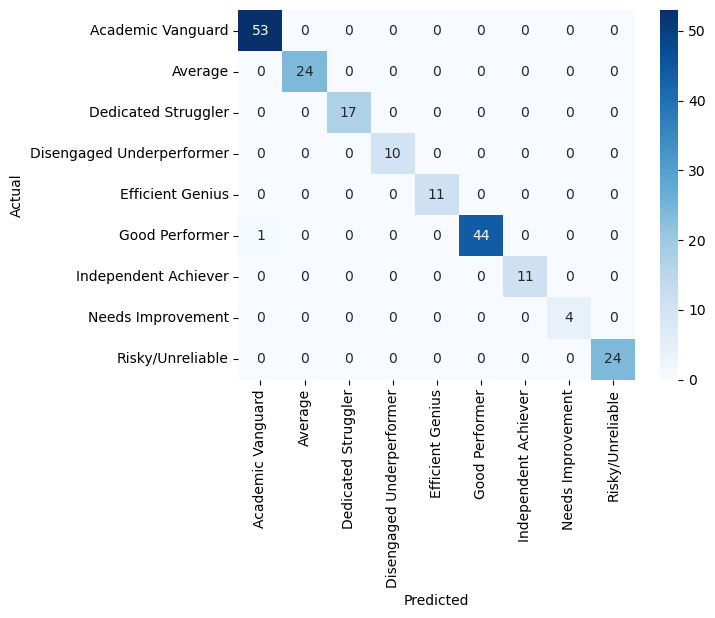

In [115]:
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

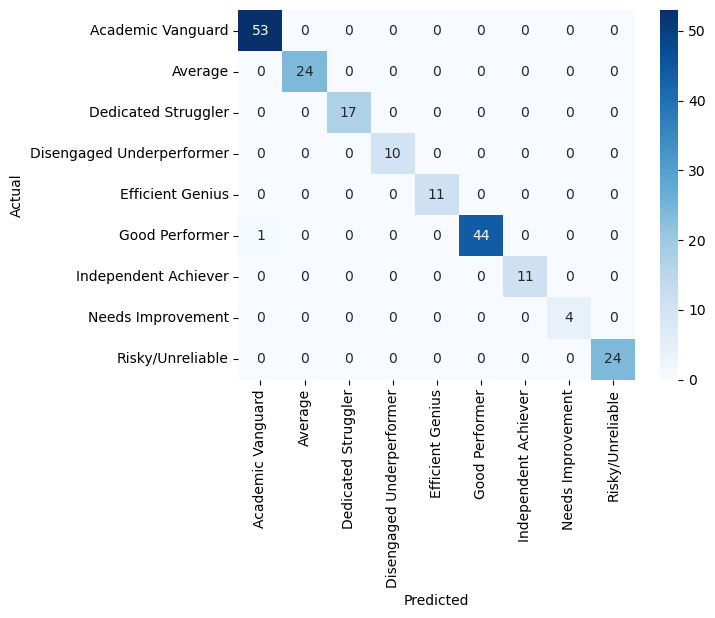

In [116]:
cm = confusion_matrix(y_test, y_pred, labels=gb.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=gb.classes_, yticklabels=gb.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Rechecking the CV 

In [117]:
scores = cross_val_score(rf, X_train_subset, y_train, cv=5, scoring='accuracy')
print(scores)
print("Mean CV Accuracy For Random Forest:", scores.mean())

[0.98742138 0.99371069 0.98742138 0.98734177 0.99367089]
Mean CV Accuracy: 0.989913223469469


In [118]:
scores = cross_val_score(gb, X_train_subset, y_train, cv=5, scoring='accuracy')
print(scores)
print("Mean CV Accuracy For Gradient Boosting:", scores.mean())

[0.97484277 0.98742138 0.98742138 0.98101266 0.98101266]
Mean CV Accuracy For Gradient Boosting: 0.9823421702093782


### Measuring how realiable the Model is

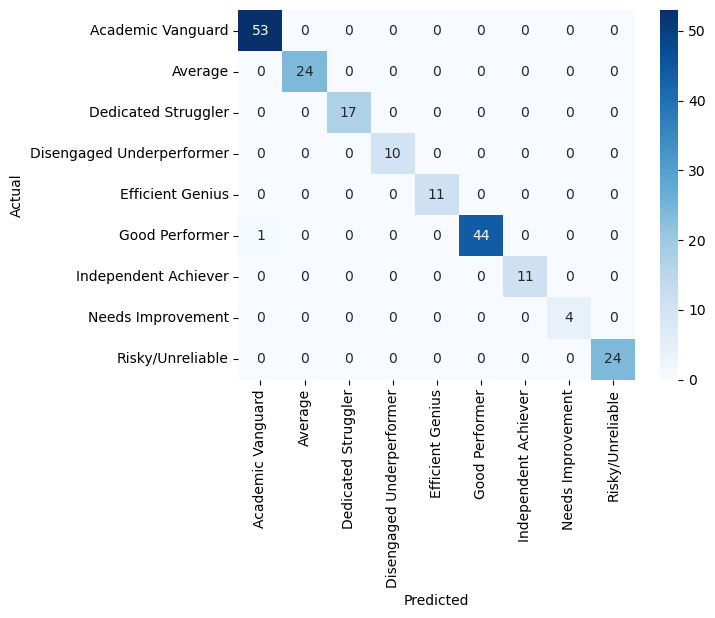

In [122]:
cm = confusion_matrix(y_test, y_pred, labels=gb.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=gb.classes_, yticklabels=gb.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [123]:
scores = cross_val_score(gb, X_train_subset, y_train, cv=5, scoring='accuracy')
print(scores)
print("Mean CV Accuracy For Gradient Boosting:", scores.mean())

[0.97484277 0.98742138 0.98742138 0.98101266 0.98101266]
Mean CV Accuracy For Gradient Boosting: 0.9823421702093782


In [125]:
print(classification_report(y_test, y_pred))

                           precision    recall  f1-score   support

        Academic Vanguard       0.98      1.00      0.99        53
                  Average       1.00      1.00      1.00        24
      Dedicated Struggler       1.00      1.00      1.00        17
Disengaged Underperformer       1.00      1.00      1.00        10
         Efficient Genius       1.00      1.00      1.00        11
           Good Performer       1.00      0.98      0.99        45
     Independent Achiever       1.00      1.00      1.00        11
        Needs Improvement       1.00      1.00      1.00         4
         Risky/Unreliable       1.00      1.00      1.00        24

                 accuracy                           0.99       199
                macro avg       1.00      1.00      1.00       199
             weighted avg       1.00      0.99      0.99       199

